## NOTEBOOK 02

In this notebook we are going to see how to use random sampling to estimate integrals and, in the second section, we use the pseudo-random number generator to simulate a random walk in three dimensions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### EXERCISE 02.1

In this first part we are going to calcuate an integral through Monte Carlo methods.
The integral to be evaluated is $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$

In this case we simply use the uniform random number generator and calculate the value of the integral and the statistical uncertainty associated with it using the blocking method.

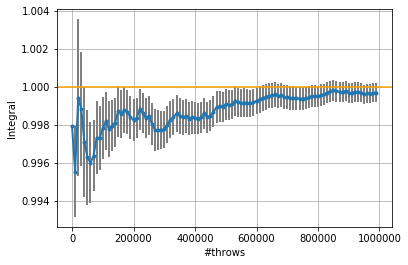

In [2]:
#Create the plot of the first point of Exercise 02.1

data1=open('data/integral_uniform.txt','r').read().split('\n')

data1=[x.split(',') for x in data1]


x= np.zeros(len(data1)-1)
y= np.zeros(len(data1)-1)
y_err= np.zeros(len(data1)-1)

for i in range(len(data1)-1):
    x[i]=data1[i][0]
    y[i]=data1[i][1]
    y_err[i]=data1[i][2]
    
plt.errorbar(x,y,yerr=y_err,marker=".",lw=2,ecolor='gray')
plt.axhline(1,color='orange')
plt.xlabel('#throws')
plt.ylabel('Integral')
plt.grid(True)
plt.show()

2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

In this case we chose the probability distribution described by the normalized function $p(x)=2(1-x)$. This choice is due to the fact that in this way the probability is closer to the shape of the function we are integrating, bringing to a smaller variance in the integral calculation for fixed number of Monte Carlo steps.

This is also a probability distribution easy to sample using the Ulam results for one-dimensional distribution: sampling a $y$ random variable uniform in $[0,1]$, we have that $x=1-\sqrt{1-y}$ will be distributed as $p(x)$.

However, switching to a non-uniform distribution probability requires caution in considering the function we are now integrating with the Monte Carlo method, in fact

$$
I= \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 \frac{\pi}{4}\frac{\cos(\pi x/2)}{1-x}*2(1-x) dx
$$

so now

$$
g(x)= \frac{\pi}{4}\frac{\cos(\pi x/2)}{1-x}
$$

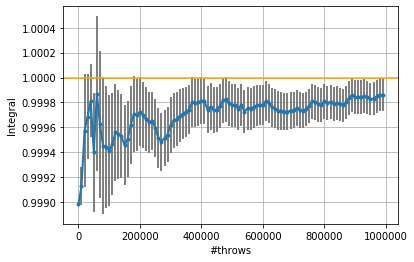

In [5]:
data2=open('data/integral_importance.txt','r').read().split('\n')

data2=[x.split(',') for x in data2]


x= np.zeros(len(data2)-1)
y= np.zeros(len(data2)-1)
y_err= np.zeros(len(data2)-1)

for i in range(len(data2)-1):
    x[i]=data2[i][0]
    y[i]=data2[i][1]
    y_err[i]=data2[i][2]
    
plt.errorbar(x,y,yerr=y_err,marker=".",lw=2,ecolor='gray')
plt.axhline(1,color='orange')
plt.xlabel('#throws')
plt.ylabel('Integral')
plt.grid(True)
plt.show()

### EXERCISE 02.2

In this exercise we want to generate random walks in 3 dimensions, initially on a lattice of length $a=1$ and then in the free space with step size again $a=1$

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$. We are going to plot $\sqrt{\langle |\vec{r}_N|^2 \rangle}$  as a function of the number of steps $i$ , where $N$ indicates the number of different random walker initialized.

In this case we chose $N=10000$ and the number of steps $i\in [0,100]$.

The value of $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ is calculated by considering for each step the distance squared of each of the $N$ walkers, calculating the mean of those values and then putting it under the square root. 

In order to calculate the mean and the error for each step we use the blocking method: for each step a number $B=100$ of blocks is considered, therefore we have $\frac{N}{B}$ walkers per block. The final cumulative results and error of all the $B$ blocks is here reported for every step.

In [6]:
from scipy.optimize import curve_fit

def f(x,k):
    return k*(x**0.5)

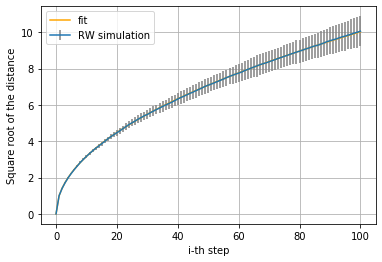

Parameter of the fitting: k =  1.002639604383599


In [12]:
data3=open('data/Lattice_walk.txt','r').read().split('\n')

data3=[x.split(',') for x in data3]


x= np.zeros(len(data3))
y= np.zeros(len(data3))
y_err= np.zeros(len(data3))

for i in range(len(data3)):
    x[i]=i
    y[i]=float(data3[i][0])
    y_err[i]=float(data3[i][1])
    
plt.errorbar(x,y,yerr=y_err,lw=1.5,ecolor='gray',label="RW simulation")
plt.xlabel('i-th step')
plt.ylabel('Square root of the distance')
plt.grid(True)


p_opt,_ = curve_fit(f, x, y)
plt.plot(x,f(x,p_opt[0]),label='fit',color='orange')
plt.legend()


plt.show()
plt.close()

print("Parameter of the fitting: k = ", p_opt[0])

2. in the continuum; at each discrete time the walker makes a step of length equal to $a=1$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Here again we chose $N=10000$ and the number of steps $i\in [0,100]$.

The way we produced the uniform solid angle was the following:

- $\phi$ sampled uniformly in $[0,2\pi]$
- $\theta$ sampled according to the distribution $p(\theta)=\frac{1}{2}\sin(\theta)$ in $[0,\pi]$, obtained by sampling uniformly x in $[0,1]$ and calculating $\theta=\cos^{-1}(1-2x)$

The procedure to calculate the mean value and the error is the same as before.

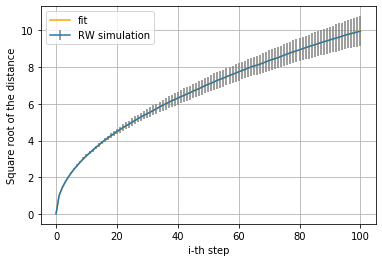

Parameter of the fitting: k =  0.9995024903937345


In [11]:
data4=open('data/Uniform_walk.txt','r').read().split('\n')

data4=[x.split(',') for x in data4]


x= np.zeros(len(data4))
y= np.zeros(len(data4))
y_err= np.zeros(len(data4))

for i in range(len(data4)):
    x[i]=i
    y[i]=data4[i][0]
    y_err[i]=data4[i][1]
    
plt.errorbar(x,y,yerr=y_err,lw=1.5,ecolor='gray',label="RW simulation")
plt.xlabel('i-th step')
plt.ylabel('Square root of the distance')
plt.grid(True)

p_opt,_ = curve_fit(f, x, y)
plt.plot(x,f(x,p_opt[0]),label='fit',color='orange')
plt.legend()

plt.show()
plt.close()
print("Parameter of the fitting: k = ", p_opt[0])

Results indicate a diffusive behaviour of both random walks, with the error that grows as a function of the number of steps, as it is expected for a random walk with indipendent moves.